In [4]:
import warnings
warnings.filterwarnings('ignore')
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from datetime import timedelta
import xarray as xr
import sys, os
import cartopy
cartopy.config['pre_existing_data_dir'] = '/home1/datawork/kbalem/cartopy_shapefiles/'
cartopy.config['data_dir'] = '/home1/datawork/kbalem/cartopy_shapefiles/'
cartopy.config['repo_data_dir'] = '/home1/datawork/kbalem/cartopy_shapefiles/'
import cartopy.crs as ccrs
import cartopy.feature as cfeature
land_feature=cfeature.NaturalEarthFeature(category='physical',name='land',scale='50m',facecolor=[0.4,0.6,0.7])
pr1=ccrs.PlateCarree()

In [5]:
files = glob('/home/shom_simurep/public_no_ftp/PROJETS/IberArgo/GIGATL/NEW_DOMAIN/gigatl1_1h_tides_iberia2_daily_2008-*.nc')
files.sort()
print(files[0],'\n to \n',files[-1])
ds = xr.open_dataset(files[0])
ds

/home/shom_simurep/public_no_ftp/PROJETS/IberArgo/GIGATL/NEW_DOMAIN/gigatl1_1h_tides_iberia2_daily_2008-03-14.nc 
 to 
 /home/shom_simurep/public_no_ftp/PROJETS/IberArgo/GIGATL/NEW_DOMAIN/gigatl1_1h_tides_iberia2_daily_2008-10-14.nc


<xarray.Dataset> Size: 3GB
Dimensions:     (time: 1, eta_rho: 1401, xi_rho: 1156, s_rho: 100, xi_u: 1155,
                 eta_v: 1400)
Coordinates:
  * time        (time) float64 8B 9.215e+08
Dimensions without coordinates: eta_rho, xi_rho, s_rho, xi_u, eta_v
Data variables: (12/14)
    zeta        (time, eta_rho, xi_rho) float32 6MB ...
    temp        (time, s_rho, eta_rho, xi_rho) float32 648MB ...
    salt        (time, s_rho, eta_rho, xi_rho) float32 648MB ...
    u           (time, s_rho, eta_rho, xi_u) float32 647MB ...
    v           (time, s_rho, eta_v, xi_rho) float32 647MB ...
    lon_rho     (eta_rho, xi_rho) float64 13MB ...
    ...          ...
    mask_rho    (eta_rho, xi_rho) float64 13MB ...
    pm          (eta_rho, xi_rho) float64 13MB ...
    pn          (eta_rho, xi_rho) float64 13MB ...
    h           (eta_rho, xi_rho) float64 13MB ...
    f           (eta_rho, xi_rho) float64 13MB ...
    angle       (eta_rho, xi_rho) float64 13MB ...
Attributes: (12/69)
    jzoom0:          8680
    jzoom1:          10080
    izoom0:          7875
    izoom1:          9030
    Cs_r:            [-9.91966929e-01 -9.75310303e-01 -9.57903911e-01 -9.3979...
    Cs_w:            [-1.00000000e+00 -9.83735238e-01 -9.66697847e-01 -9.4893...
    ...              ...
    gamma2_expl:     Slipperiness parameter
    x_sponge:        0.0
    v_sponge:        0.0
    sponge_expl:     Sponge parameters : extent (m) & viscosity (m2.s-1)
    SRCS:            main.F step.F read_inp.F timers_roms.F init_scalars.F in...
    CPP-options:     REGIONAL GIGATL1 MPI_TIME MPI TIDES OBC_EAST OBC_NORTH O...

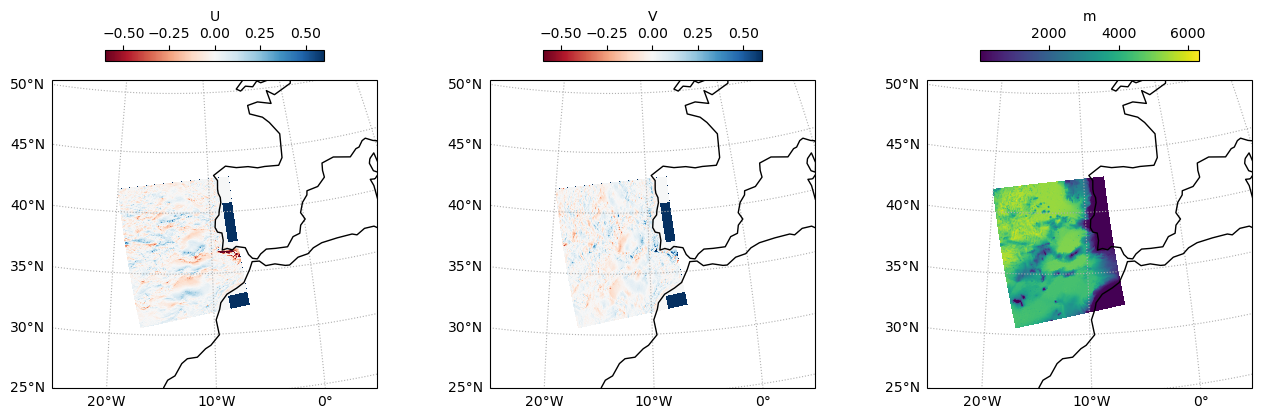

In [19]:
fig=plt.figure(figsize=(16,5))
extent=[-25,5,25,50]
pr1=ccrs.PlateCarree()
pr2=ccrs.NearsidePerspective(central_latitude=36,central_longitude=-14)
ax1 = fig.add_subplot(1, 3, 1, projection=pr2)
a=ax1.pcolormesh(ds['lon_rho'],ds['lat_rho'],ds['u'].isel(time=0,s_rho=0),shading='auto',transform=pr1,vmin=-0.6,vmax=0.6,cmap=plt.get_cmap('RdBu'))
ax1.coastlines(resolution='110m',zorder=10)
plt.colorbar(a,location='top',shrink=0.6,label='U')
ga=ax1.gridlines(linestyle=':',draw_labels=True)
ga.top_labels, ga.right_labels = False, False
ax1.set_extent(extent)
ax1 = fig.add_subplot(1, 3, 2, projection=pr2)
a=ax1.pcolormesh(ds['lon_rho'],ds['lat_rho'],ds['v'].isel(time=0,s_rho=0),shading='auto',transform=pr1,vmin=-0.6,vmax=0.6,cmap=plt.get_cmap('RdBu'))
ax1.coastlines(resolution='110m',zorder=10)
plt.colorbar(a,location='top',shrink=0.6,label='V')
ga=ax1.gridlines(linestyle=':',draw_labels=True)
ga.top_labels, ga.right_labels = False, False
ax1.set_extent(extent)
ax1 = fig.add_subplot(1, 3, 3, projection=pr2)
a=ax1.pcolormesh(ds['lon_rho'],ds['lat_rho'],ds['h'],shading='auto',transform=pr1,cmap=plt.get_cmap('viridis'))
ax1.coastlines(resolution='110m',zorder=10)
ga=ax1.gridlines(linestyle=':',draw_labels=True)
ga.top_labels, ga.right_labels = False, False
plt.colorbar(a,location='top',shrink=0.6,label='m')
ax1.set_extent(extent)